# ECH 60 Spring 2022: QUIZ 4

<font color='red'> Total 5.5+3+4=12.5 points</font>. 

Stop working on this quiz within 45 minutes of starting it. Rename this file as lastname_firstname and upload to canvas in the correct ipynb format within an hour of your section start time. Partial points will be awarded ONLY IF a reasonably accurate attempt has been made. 

You may consult your notes, lecture material, or tutorials. You must NOT consult any other sources. You should NOT seek help from anyone else for the duration of the quiz. And you should NOT share or discuss questions with other sections after your quiz. Any violation of these rules will be treated as academic misconduct, and  will be reported as such to the office of student support and judicial affairs.

Acknowledge abiding by these rules by writing a single line of code to print your name:
<font color='red'> [-0.5 point if incomplete] </font>

In [1]:
print('Devin Fan')

Devin Fan


**PROBLEM 0:** First, run the following code cell to import modules and familiar functions we have developed in past tutorials.

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.optimize as so
import scipy.ndimage as sim

def func_deriv(f,a):
    h=0.01
    f_front=f(a+h)
    f_back=f(a-h)    
    dfdx=(f_front-f_back)/(2*h)
    return dfdx

def data_deriv(y,x):
    h=x[1]-x[0]
    dydx=np.zeros(y.shape)    
    dydx[0]=(-3*y[0]+4*y[1]-y[2])/(2*h)
    dydx[-1]=(3*y[-1]-4*y[-2]+y[-3])/(2*h)
    dydx[1:-1]=(y[2:]-y[:-2])/(2*h)
    
    return dydx

def func_deriv2(f,a):
    h=0.01
    f_front=f(a+h)
    f_current=f(a)
    f_back=f(a-h)    
    d2fdx2=(f_front-2*f_current+f_back)/(h**2)    
    return d2fdx2

def data_deriv2(y,x):
    h=x[1]-x[0]
    d2ydx2=np.zeros(y.shape) # initialize
    
    # first point
    d2ydx2[0]=(2*y[0]-5*y[1]+4*y[2]-y[3])/(h**2)
    #last point
    d2ydx2[-1]=(2*y[-1]-5*y[-2]+4*y[-3]-y[-4])/(h**2)
    # all other points, vectorized
    d2ydx2[1:-1]=(y[2:]-2*y[1:-1]+y[:-2])/(h**2)
    
    return d2ydx2

def linfit(x,y):
    n=len(x)
    sx=sum(x)
    sy=sum(y)
    sxx=sum(x**2)
    sxy=sum(x*y)

    a=(sx*sxy-sy*sxx)/(sx**2-n*sxx)
    b=(sx*sy-n*sxy)/(sx**2-n*sxx)
    return a,b

**PROBLEM 1:**  <font color='green'> [Total 5.5 points] </font>



**1 (a):** Create an array `t` containing 300 points between 0 to 10. Create another array `y` which contains the values 

$$ y(t) = \left[ \sin(t)+\frac{1}{2}\sin^2(2t) \right]e^{-t/5}$$

<font color='green'> [0.5 point for correct t array, 0.5 point for y(t)] </font>

In [3]:
t=np.linspace(0,10,300)
y=(np.sin(t)+0.5*np.sin(2*t)**2)*np.exp(-t/5)

**1 (b):** Find the derivative of $y$ with respect to $t$ using second-order finite differences using the `data_deriv` function.


<font color='green'> [0.5 point] </font>

In [4]:
yder=data_deriv(y,t)

**1 (c):** Create a 1D filter array named `f50` to represent a moving average across 50 points. 

<font color='green'> [0.5 point] </font>

In [5]:
f50=np.ones(50)/50

**1 (d):** Generate a new array by convolving the the derivative of $y(t)$ with the above `f50` filter. 

<font color='green'> [0.5 points] </font>

In [6]:
y50=sim.convolve(yder,f50)

**1 (e):** Plot the derivative using a solid line and the filtered derivative using a dashed line of a different color. Provide axis labels and a legend.

<font color='green'> [0.5 point for each curve, 0.5 point for legend+labels = total 2 points] </font>

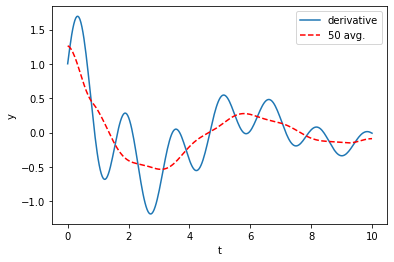

In [7]:
plt.plot(t,yder,label='derivative')
plt.plot(t,y50,'r--',label='50 avg.')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.show()

**1 (f):** Find the second derivative of $y^2(t)$ using the provided finite difference function. **only one line of code required**

<font color='green'> [1 point with partial credit] </font>

In [8]:
yder2=data_deriv2(y**2,t)

**PROBLEM 2:**  <font color='green'> [Total 3 points] </font>



**2(a):** Import and display the image file `microtubules.jpg` provided with the quiz on canvas.

<font color='green'> [1 point for imread, 0.5 point for imshow] </font>

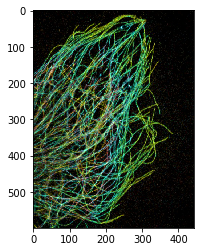

In [9]:
mt=plt.imread('microtubules.jpg')

plt.imshow(mt)
plt.show()

**2(b):** Create a 2D array containing only the green slice thresholded to >50% intensity (meaning green pixel value at 128 or higher). Display this array using a green colormap.

<font color='green'> [0.5 point for green slice, 0.5 point for correct thresholding, 0.5 point for imshow with cmap=Greens] </font>

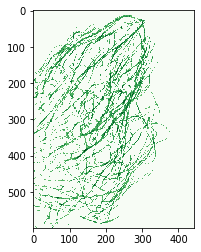

In [10]:
mt1=(mt[:,:,1]>=128)*mt[:,:,1]
plt.imshow(mt1,cmap='Greens')
plt.show()

**PROBLEM 3:** <font color='green'> [Total 4 points] </font>

A simple model that relates applied stress, $\sigma$, to the fractional deformation (also known as strain), $\epsilon$, for biological tissue is

$$ \frac{d \sigma}{d \epsilon} = a+ b \sigma,  $$

where $a$ and $b$ are material constants. The following stresses and strains were recorded in an experiment. 

$$\begin{matrix} 
{\sigma~({\rm kN/m^2})} & 0 & 252 & 531 & 840 & 1184 & 1558 & 1975 & 2444 & 2943 & 3500 & 4114\\
{\epsilon}& 0 &  0.05 & 0.10 & 0.15 & 0.20 & 0.25 & 0.30 & 0.35 & 0.40 & 0.45 & 0.50 
\end{matrix}$$

Find $a$ and $b$ using a linear fit between appropriate variables. 

<font color='green'> [0.5 point each for sigma, epsilon arrays, 1 point for finding derivative of sigma, 1 point for linear fitting between epsilon and derivative of sigma. Partial credit for wrong fit or wrong variables.] </font>

In [11]:
sig = np.array([0,252,531,840,1184,1558,1975,2444,2943,3500,4114])
eps=np.arange(0,0.51,0.05)

dsde=data_deriv(sig,eps)

a,b=linfit(sig,dsde)

print('a is %.4f and b is %.4f' %(a,b))

a is 4847.7290 and b is 1.9603


*Rough work/test cells (won't be graded):*